In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r SouthAfrica_2020

In [5]:
SouthAfrica_2020

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
1,1,NP Kenjige (USA),1,1,0,0,0,0.00,3,0.00,...,15,2,2/15,7.50,6.42,7.0,0,0,0,0
3,3,Aaron Jones (USA),4,4,1,68,47*,22.66,125,54.40,...,-,-,-,-,-,-,-,-,1,0
4,4,SA Abbott (AUS),1,1,0,4,4,4.00,9,44.44,...,84,1,1/84,84.00,8.40,60.0,0,0,0,0
13,13,Akshay Homraj (USA),4,4,0,60,44,15.00,88,68.18,...,-,-,-,-,-,-,-,-,5,0
28,28,T Bavuma (SA),4,4,0,174,98,43.50,193,90.15,...,-,-,-,-,-,-,-,-,3,0
57,57,Q de Kock (SA),6,6,0,228,107,38.00,260,87.69,...,-,-,-,-,-,-,-,-,6,1
64,64,DM Dupavillon (SA),1,-,-,-,-,-,-,-,...,21,1,1/21,21.00,3.50,36.0,0,0,0,0
74,74,BC Fortuin (SA),1,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
76,76,K Gore (USA),3,3,0,18,10,6.00,46,39.13,...,62,1,1/11,62.00,4.42,84.0,0,0,2,0
84,84,BE Hendricks (SA),3,1,0,3,3,3.00,6,50.00,...,105,4,3/59,26.25,5.83,27.0,0,0,1,0


In [6]:
SouthAfrica_2020=SouthAfrica_2020.reset_index()

In [7]:
SouthAfrica_2020

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,1,1,NP Kenjige (USA),1,1,0,0,0,0.00,3,...,15,2,2/15,7.50,6.42,7.0,0,0,0,0
1,3,3,Aaron Jones (USA),4,4,1,68,47*,22.66,125,...,-,-,-,-,-,-,-,-,1,0
2,4,4,SA Abbott (AUS),1,1,0,4,4,4.00,9,...,84,1,1/84,84.00,8.40,60.0,0,0,0,0
3,13,13,Akshay Homraj (USA),4,4,0,60,44,15.00,88,...,-,-,-,-,-,-,-,-,5,0
4,28,28,T Bavuma (SA),4,4,0,174,98,43.50,193,...,-,-,-,-,-,-,-,-,3,0
5,57,57,Q de Kock (SA),6,6,0,228,107,38.00,260,...,-,-,-,-,-,-,-,-,6,1
6,64,64,DM Dupavillon (SA),1,-,-,-,-,-,-,...,21,1,1/21,21.00,3.50,36.0,0,0,0,0
7,74,74,BC Fortuin (SA),1,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
8,76,76,K Gore (USA),3,3,0,18,10,6.00,46,...,62,1,1/11,62.00,4.42,84.0,0,0,2,0
9,84,84,BE Hendricks (SA),3,1,0,3,3,3.00,6,...,105,4,3/59,26.25,5.83,27.0,0,0,1,0


In [8]:
SouthAfrica_2020.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
SouthAfrica_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,NP Kenjige (USA),1,1,0,0,0,0.00,3,0.00,0,...,15,2,2/15,7.50,6.42,7.0,0,0,0,0
1,Aaron Jones (USA),4,4,1,68,47*,22.66,125,54.40,0,...,-,-,-,-,-,-,-,-,1,0
2,SA Abbott (AUS),1,1,0,4,4,4.00,9,44.44,0,...,84,1,1/84,84.00,8.40,60.0,0,0,0,0
3,Akshay Homraj (USA),4,4,0,60,44,15.00,88,68.18,0,...,-,-,-,-,-,-,-,-,5,0
4,T Bavuma (SA),4,4,0,174,98,43.50,193,90.15,0,...,-,-,-,-,-,-,-,-,3,0
5,Q de Kock (SA),6,6,0,228,107,38.00,260,87.69,1,...,-,-,-,-,-,-,-,-,6,1
6,DM Dupavillon (SA),1,-,-,-,-,-,-,-,-,...,21,1,1/21,21.00,3.50,36.0,0,0,0,0
7,BC Fortuin (SA),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
8,K Gore (USA),3,3,0,18,10,6.00,46,39.13,0,...,62,1,1/11,62.00,4.42,84.0,0,0,2,0
9,BE Hendricks (SA),3,1,0,3,3,3.00,6,50.00,0,...,105,4,3/59,26.25,5.83,27.0,0,0,1,0


In [10]:
SouthAfrica_2020_players =SouthAfrica_2020.copy()

In [11]:
SouthAfrica_2020_players.drop('Player',axis=1,inplace=True)

In [12]:
SouthAfrica_2020_players.HS=SouthAfrica_2020_players.HS.str.extract('(\d+)')
SouthAfrica_2020_players['HS'].fillna(value=0, inplace=True)


In [13]:
SouthAfrica_2020_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,1,1,0,0,0,0.00,3,0.00,0,0,...,15,2,2/15,7.50,6.42,7.0,0,0,0,0
1,4,4,1,68,47,22.66,125,54.40,0,0,...,-,-,-,-,-,-,-,-,1,0
2,1,1,0,4,4,4.00,9,44.44,0,0,...,84,1,1/84,84.00,8.40,60.0,0,0,0,0
3,4,4,0,60,44,15.00,88,68.18,0,0,...,-,-,-,-,-,-,-,-,5,0
4,4,4,0,174,98,43.50,193,90.15,0,1,...,-,-,-,-,-,-,-,-,3,0
5,6,6,0,228,107,38.00,260,87.69,1,1,...,-,-,-,-,-,-,-,-,6,1
6,1,-,-,-,0,-,-,-,-,-,...,21,1,1/21,21.00,3.50,36.0,0,0,0,0
7,1,-,-,-,0,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
8,3,3,0,18,10,6.00,46,39.13,0,0,...,62,1,1/11,62.00,4.42,84.0,0,0,2,0
9,3,1,0,3,3,3.00,6,50.00,0,0,...,105,4,3/59,26.25,5.83,27.0,0,0,1,0


In [14]:
SouthAfrica_2020_players.replace("-",0,inplace=True)

In [15]:
SouthAfrica_2020_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

SouthAfrica_2020_players_scaled = pd.DataFrame(scaler.fit_transform(SouthAfrica_2020_players),columns=SouthAfrica_2020_players.columns)
SouthAfrica_2020_players_scaled.shape
SouthAfrica_2020_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.758256,-0.996815,-0.554416,-0.803978,-0.881844,-0.559502,-0.890908,-1.694111,-0.316228,-0.524404,...,-0.568796,-0.709878,0.033113,-0.511171,1.180087,-0.568276,0.0,-0.176777,-0.931625,-0.176777
1,0.473377,0.976879,0.665299,0.141581,0.355930,-0.106205,0.667891,-0.160773,-0.316228,-0.524404,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,-0.263285,-0.176777
2,-1.758256,-0.996815,-0.554416,-0.748357,-0.776502,-0.479485,-0.814246,-0.441509,-0.316228,-0.524404,...,-0.568796,0.339727,-0.331133,1.846207,1.928045,0.817357,0.0,-0.176777,-0.931625,-0.176777
3,0.473377,0.976879,-0.554416,0.030339,0.276923,-0.259438,0.195140,0.227635,-0.316228,-0.524404,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,2.410073,-0.176777
4,0.473377,0.976879,-0.554416,1.615541,1.699047,0.310685,1.536729,0.846889,-0.316228,1.048809,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,1.073394,-0.176777


In [17]:
SouthAfrica_2020_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,...,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,3.300000e+01,33.0,3.300000e+01,3.300000e+01,3.300000e+01
mean,-1.009294e-16,1.177509e-17,-2.018587e-17,1.682156e-17,2.355019e-17,3.953067e-17,-1.110223e-16,-1.816729e-16,-2.355019e-17,1.009294e-16,...,6.728624e-18,1.211152e-16,-3.364312e-17,-9.420074e-17,8.074349e-17,4.710037e-17,0.0,-6.055762e-17,-6.055762e-17,-2.018587e-17
std,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,...,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,1.015505e+00,0.0,1.015505e+00,1.015505e+00,1.015505e+00
min,-1.758256e+00,-1.654713e+00,-5.544160e-01,-8.039781e-01,-8.818444e-01,-5.595024e-01,-9.292393e-01,-1.694111e+00,-3.162278e-01,-5.244044e-01,...,-5.687965e-01,-9.380530e-01,-6.953795e-01,-7.422870e-01,-1.245107e+00,-7.512838e-01,0.0,-1.767767e-01,-9.316247e-01,-1.767767e-01
25%,-2.705009e-01,-9.968153e-01,-5.544160e-01,-7.483569e-01,-8.028376e-01,-5.194937e-01,-8.142459e-01,-5.911791e-01,-3.162278e-01,-5.244044e-01,...,-5.687965e-01,-9.380530e-01,-6.953795e-01,-7.422870e-01,-1.245107e+00,-7.512838e-01,0.0,-1.767767e-01,-9.316247e-01,-1.767767e-01
50%,-2.705009e-01,3.189809e-01,-5.544160e-01,-4.702513e-01,-4.604744e-01,-3.994679e-01,-3.287184e-01,-3.985381e-02,-3.162278e-01,-5.244044e-01,...,-5.687965e-01,-3.752212e-01,-3.311331e-01,-2.467753e-01,4.245751e-01,-3.068356e-01,0.0,-1.767767e-01,-2.632852e-01,-1.767767e-01
75%,4.733766e-01,9.768790e-01,6.652991e-01,1.415810e-01,4.349369e-01,1.138427e-01,6.040055e-01,7.775507e-01,-3.162278e-01,-5.244044e-01,...,2.843982e-01,6.895957e-01,3.973597e-01,2.539749e-01,7.494454e-01,3.990526e-01,0.0,-1.767767e-01,4.050542e-01,-1.767767e-01
max,1.961131e+00,2.292675e+00,3.104729e+00,2.561100e+00,2.515451e+00,4.281541e+00,2.392791e+00,2.208572e+00,3.162278e+00,2.622022e+00,...,3.697177e+00,2.332456e+00,3.675577e+00,3.756762e+00,1.928045e+00,3.954638e+00,0.0,5.656854e+00,3.078412e+00,5.656854e+00


In [18]:
X =  SouthAfrica_2020_players_scaled.iloc[:,:].values

In [19]:
X

array([[-1.75825579e+00, -9.96815279e-01, -5.54415953e-01,
        -8.03978054e-01, -8.81844444e-01, -5.59502370e-01,
        -8.90908150e-01, -1.69411143e+00, -3.16227766e-01,
        -5.24404424e-01,  1.33684785e+00, -7.88458209e-01,
        -6.01040764e-01, -1.75851522e+00, -1.75825579e+00,
        -4.05054205e-01, -7.78195549e-01, -5.68796459e-01,
        -7.09877948e-01,  3.31133089e-02, -5.11171495e-01,
         1.18008748e+00, -5.68275689e-01,  0.00000000e+00,
        -1.76776695e-01, -9.31624671e-01, -1.76776695e-01],
       [ 4.73376558e-01,  9.76878973e-01,  6.65299144e-01,
         1.41581041e-01,  3.55929975e-01, -1.06204701e-01,
         6.67890726e-01, -1.60773304e-01, -3.16227766e-01,
        -5.24404424e-01, -5.81238194e-01,  1.81198470e-01,
        -6.01040764e-01, -1.73120008e+00,  4.73376558e-01,
        -1.07339364e+00, -9.49710414e-01, -5.68796459e-01,
        -9.38053003e-01, -6.95379487e-01, -7.42287012e-01,
        -1.24510734e+00, -7.51283753e-01,  0.00000000e+

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(SouthAfrica_2020_players_scaled))

False

In [23]:
SouthAfrica_2020_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,-1.758256,-0.996815,-0.554416,-0.803978,-0.881844,-0.559502,-0.890908,-1.694111,-0.316228,-0.524404,...,-0.568796,-0.709878,0.033113,-0.511171,1.180087,-0.568276,0.0,-0.176777,-0.931625,-0.176777
1,0.473377,0.976879,0.665299,0.141581,0.355930,-0.106205,0.667891,-0.160773,-0.316228,-0.524404,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,-0.263285,-0.176777
2,-1.758256,-0.996815,-0.554416,-0.748357,-0.776502,-0.479485,-0.814246,-0.441509,-0.316228,-0.524404,...,-0.568796,0.339727,-0.331133,1.846207,1.928045,0.817357,0.0,-0.176777,-0.931625,-0.176777
3,0.473377,0.976879,-0.554416,0.030339,0.276923,-0.259438,0.195140,0.227635,-0.316228,-0.524404,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,2.410073,-0.176777
4,0.473377,0.976879,-0.554416,1.615541,1.699047,0.310685,1.536729,0.846889,-0.316228,1.048809,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,1.073394,-0.176777
5,1.961131,2.292675,-0.554416,2.366426,1.936068,0.200661,2.392791,0.777551,3.162278,1.048809,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,3.078412,5.656854
6,-1.758256,-1.654713,-0.554416,-0.803978,-0.881844,-0.559502,-0.929239,-1.694111,-0.316228,-0.524404,...,-0.568796,-0.618608,-0.331133,-0.095164,0.077039,0.189901,0.0,-0.176777,-0.931625,-0.176777
7,-1.758256,-1.654713,-0.554416,-0.803978,-0.881844,-0.559502,-0.929239,-1.694111,-0.316228,-0.524404,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,-0.931625,-0.176777
8,-0.270501,0.318981,-0.554416,-0.553683,-0.618488,-0.439477,-0.341495,-0.591179,-0.316228,-0.524404,...,0.284398,0.005071,-0.331133,1.168268,0.424575,1.444813,0.0,-0.176777,0.405054,-0.176777
9,-0.270501,-0.996815,-0.554416,-0.762262,-0.802838,-0.499489,-0.852577,-0.284793,-0.316228,-0.524404,...,-0.568796,0.659172,0.761606,0.066617,0.957211,-0.045396,0.0,-0.176777,-0.263285,-0.176777


In [24]:
np.all(np.isfinite(SouthAfrica_2020_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


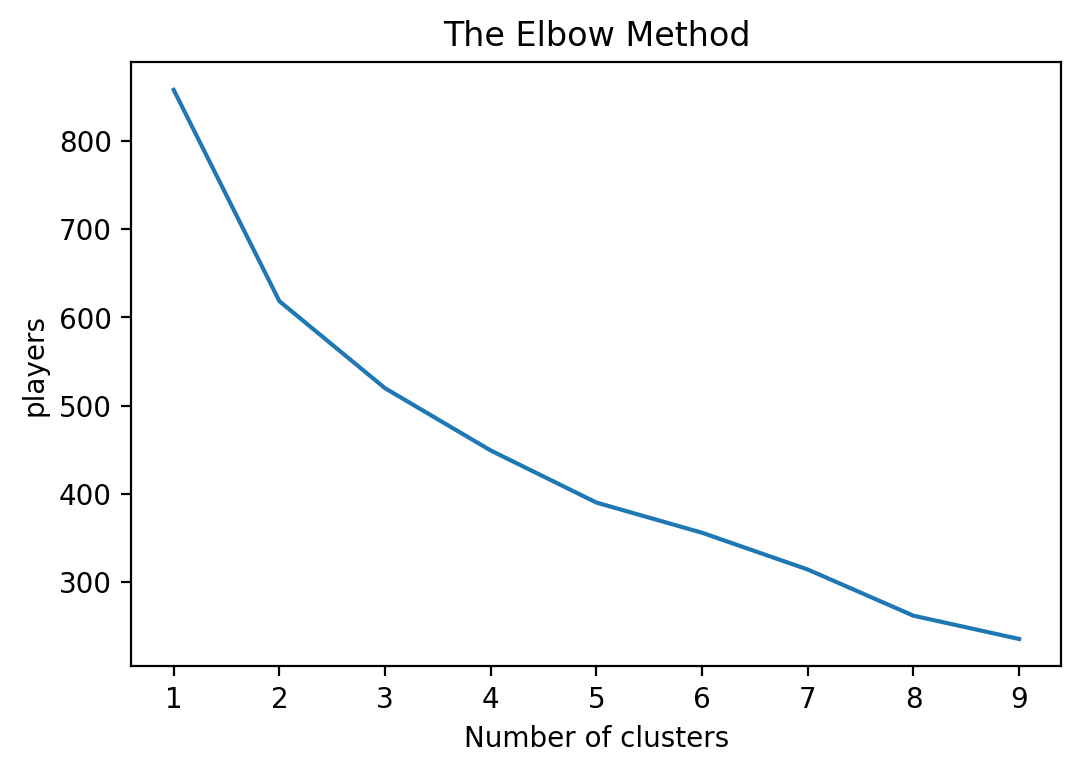

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 1, 0, 1, 2, 2, 2, 0,
       0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0])

In [28]:
kmeans.cluster_centers_

array([[-0.6176437 , -0.20733758, -0.31047293, -0.35251994, -0.29543784,
        -0.28601678, -0.31764496, -0.24721148, -0.31622777, -0.31464265,
        -0.32549339, -0.34672572, -0.21213203, -0.36271187, -0.6176437 ,
        -0.62783402, -0.62643088, -0.34127788, -0.59731159, -0.47683165,
        -0.37917886, -0.29492457, -0.3992111 ,  0.        , -0.1767767 ,
        -0.26328523, -0.1767767 ],
       [ 0.77092754,  0.97687897,  0.90924216,  1.89086537,  1.8886634 ,
         1.73099115,  1.63894576,  1.04143144,  1.77087549,  1.3634515 ,
         0.18599622,  1.57103971,  1.96575685, -0.49382451,  0.77092754,
        -0.93972576, -0.90293363, -0.56879646, -0.88024866, -0.69537949,
        -0.74228701, -0.76686798, -0.75128375,  0.        , -0.1767767 ,
         1.07339364,  0.98994949],
       [ 0.41615522, -0.13648702,  0.00852948, -0.32050214, -0.38551919,
        -0.33574647, -0.26385034, -0.11530653, -0.31622777, -0.16135521,
         0.30403229, -0.2041779 , -0.5112926 ,  0.6084

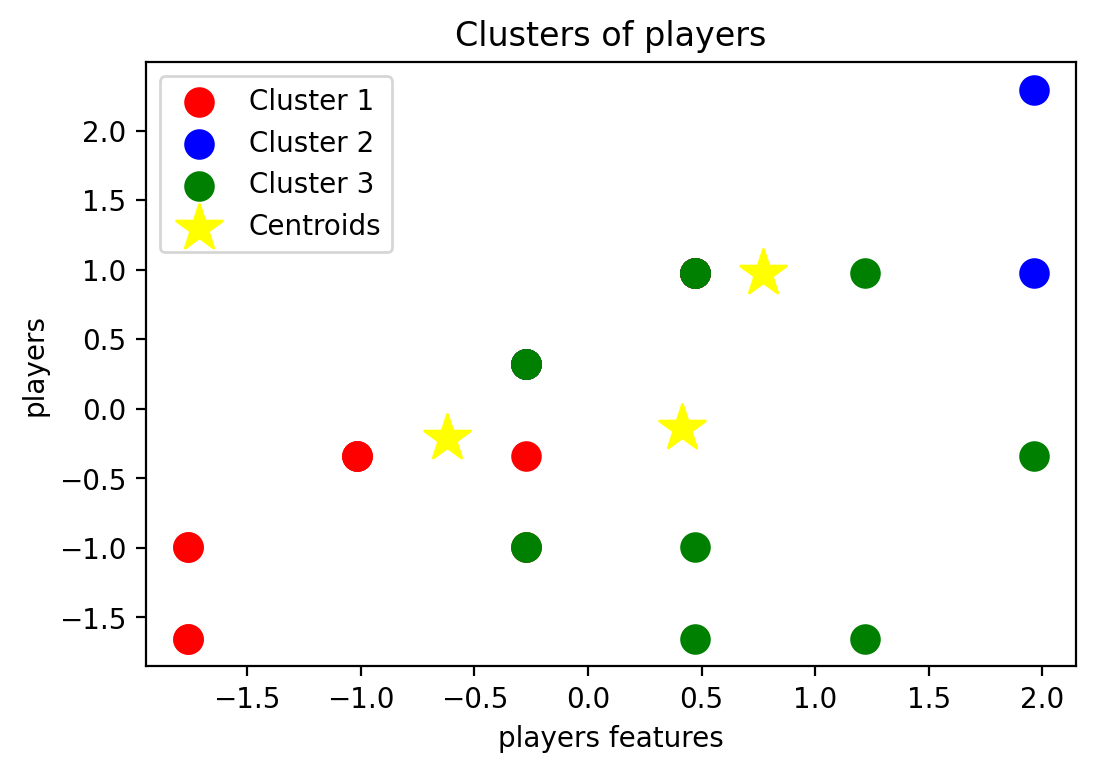

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
SouthAfrica_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,NP Kenjige (USA),1,1,0,0,0,0.00,3,0.00,0,...,15,2,2/15,7.50,6.42,7.0,0,0,0,0
1,Aaron Jones (USA),4,4,1,68,47*,22.66,125,54.40,0,...,-,-,-,-,-,-,-,-,1,0
2,SA Abbott (AUS),1,1,0,4,4,4.00,9,44.44,0,...,84,1,1/84,84.00,8.40,60.0,0,0,0,0
3,Akshay Homraj (USA),4,4,0,60,44,15.00,88,68.18,0,...,-,-,-,-,-,-,-,-,5,0
4,T Bavuma (SA),4,4,0,174,98,43.50,193,90.15,0,...,-,-,-,-,-,-,-,-,3,0
5,Q de Kock (SA),6,6,0,228,107,38.00,260,87.69,1,...,-,-,-,-,-,-,-,-,6,1
6,DM Dupavillon (SA),1,-,-,-,-,-,-,-,-,...,21,1,1/21,21.00,3.50,36.0,0,0,0,0
7,BC Fortuin (SA),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,-
8,K Gore (USA),3,3,0,18,10,6.00,46,39.13,0,...,62,1,1/11,62.00,4.42,84.0,0,0,2,0
9,BE Hendricks (SA),3,1,0,3,3,3.00,6,50.00,0,...,105,4,3/59,26.25,5.83,27.0,0,0,1,0


In [31]:
SouthAfrica_2020["cluster"] = y_kmeans

In [32]:
SouthAfrica_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,NP Kenjige (USA),1,1,0,0,0,0.00,3,0.00,0,...,2,2/15,7.50,6.42,7.0,0,0,0,0,0
1,Aaron Jones (USA),4,4,1,68,47*,22.66,125,54.40,0,...,-,-,-,-,-,-,-,1,0,0
2,SA Abbott (AUS),1,1,0,4,4,4.00,9,44.44,0,...,1,1/84,84.00,8.40,60.0,0,0,0,0,0
3,Akshay Homraj (USA),4,4,0,60,44,15.00,88,68.18,0,...,-,-,-,-,-,-,-,5,0,0
4,T Bavuma (SA),4,4,0,174,98,43.50,193,90.15,0,...,-,-,-,-,-,-,-,3,0,1
5,Q de Kock (SA),6,6,0,228,107,38.00,260,87.69,1,...,-,-,-,-,-,-,-,6,1,1
6,DM Dupavillon (SA),1,-,-,-,-,-,-,-,-,...,1,1/21,21.00,3.50,36.0,0,0,0,0,0
7,BC Fortuin (SA),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
8,K Gore (USA),3,3,0,18,10,6.00,46,39.13,0,...,1,1/11,62.00,4.42,84.0,0,0,2,0,2
9,BE Hendricks (SA),3,1,0,3,3,3.00,6,50.00,0,...,4,3/59,26.25,5.83,27.0,0,0,1,0,0


In [33]:
SouthAfrica_2020['cluster'].value_counts()

0    15
2    13
1     5
Name: cluster, dtype: int64

In [34]:
SouthAfrica_Cluster_2020 = np.array([15,5,13])

In [35]:
SouthAfrica_Cluster_2020

array([15,  5, 13])

In [36]:
%store SouthAfrica_Cluster_2020

Stored 'SouthAfrica_Cluster_2020' (ndarray)


In [37]:
SouthAfrica_2020_players_scaled.insert(0, 'Player', SouthAfrica_2020.Player)

In [38]:
SouthAfrica_2020_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,NP Kenjige (USA),-1.758256,-0.996815,-0.554416,-0.803978,-0.881844,-0.559502,-0.890908,-1.694111,-0.316228,...,-0.568796,-0.709878,0.033113,-0.511171,1.180087,-0.568276,0.0,-0.176777,-0.931625,-0.176777
1,Aaron Jones (USA),0.473377,0.976879,0.665299,0.141581,0.355930,-0.106205,0.667891,-0.160773,-0.316228,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,-0.263285,-0.176777
2,SA Abbott (AUS),-1.758256,-0.996815,-0.554416,-0.748357,-0.776502,-0.479485,-0.814246,-0.441509,-0.316228,...,-0.568796,0.339727,-0.331133,1.846207,1.928045,0.817357,0.0,-0.176777,-0.931625,-0.176777
3,Akshay Homraj (USA),0.473377,0.976879,-0.554416,0.030339,0.276923,-0.259438,0.195140,0.227635,-0.316228,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,2.410073,-0.176777
4,T Bavuma (SA),0.473377,0.976879,-0.554416,1.615541,1.699047,0.310685,1.536729,0.846889,-0.316228,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,1.073394,-0.176777
5,Q de Kock (SA),1.961131,2.292675,-0.554416,2.366426,1.936068,0.200661,2.392791,0.777551,3.162278,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,3.078412,5.656854
6,DM Dupavillon (SA),-1.758256,-1.654713,-0.554416,-0.803978,-0.881844,-0.559502,-0.929239,-1.694111,-0.316228,...,-0.568796,-0.618608,-0.331133,-0.095164,0.077039,0.189901,0.0,-0.176777,-0.931625,-0.176777
7,BC Fortuin (SA),-1.758256,-1.654713,-0.554416,-0.803978,-0.881844,-0.559502,-0.929239,-1.694111,-0.316228,...,-0.568796,-0.938053,-0.695379,-0.742287,-1.245107,-0.751284,0.0,-0.176777,-0.931625,-0.176777
8,K Gore (USA),-0.270501,0.318981,-0.554416,-0.553683,-0.618488,-0.439477,-0.341495,-0.591179,-0.316228,...,0.284398,0.005071,-0.331133,1.168268,0.424575,1.444813,0.0,-0.176777,0.405054,-0.176777
9,BE Hendricks (SA),-0.270501,-0.996815,-0.554416,-0.762262,-0.802838,-0.499489,-0.852577,-0.284793,-0.316228,...,-0.568796,0.659172,0.761606,0.066617,0.957211,-0.045396,0.0,-0.176777,-0.263285,-0.176777


In [39]:
SouthAfrica_2020_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,NP Kenjige (USA),-0.559502,-0.511171
1,Aaron Jones (USA),-0.106205,-0.742287
2,SA Abbott (AUS),-0.479485,1.846207
3,Akshay Homraj (USA),-0.259438,-0.742287
4,T Bavuma (SA),0.310685,-0.742287
5,Q de Kock (SA),0.200661,-0.742287
6,DM Dupavillon (SA),-0.559502,-0.095164
7,BC Fortuin (SA),-0.559502,-0.742287
8,K Gore (USA),-0.439477,1.168268
9,BE Hendricks (SA),-0.499489,0.066617


In [40]:
SouthAfrica_2020_Ave=SouthAfrica_2020_players_scaled.mean()

In [41]:
SouthAfrica_2020_Ave

Mat_x          -1.009294e-16
Inns_x          1.177509e-17
NO             -2.018587e-17
Runs_x          1.682156e-17
HS              2.355019e-17
Ave_x           3.953067e-17
BF             -1.110223e-16
SR_x           -1.816729e-16
100            -2.355019e-17
50              1.009294e-16
0               6.055762e-17
4s             -5.256738e-18
6s              5.382900e-17
Unnamed: 0_y    6.728624e-17
Mat_y          -1.009294e-16
Inns_y          1.749442e-16
Overs          -1.345725e-17
Mdns            6.728624e-18
Runs_y          1.211152e-16
Wkts           -3.364312e-17
Ave_y          -9.420074e-17
Econ            8.074349e-17
SR_y            4.710037e-17
4               0.000000e+00
5              -6.055762e-17
Ct             -6.055762e-17
St             -2.018587e-17
dtype: float64

In [42]:
SouthAfrica_Ave_2020 =SouthAfrica_2020_Ave[['Ave_x','Ave_y']]

In [43]:
SouthAfrica_Ave_2020

Ave_x    3.953067e-17
Ave_y   -9.420074e-17
dtype: float64

In [44]:
SouthAfrica_Ave_2020 = np.array([SouthAfrica_Ave_2020.Ave_x, SouthAfrica_Ave_2020.Ave_y])

In [45]:
SouthAfrica_Ave_2020

array([ 3.95306683e-17, -9.42007415e-17])

In [46]:
%store SouthAfrica_Ave_2020

Stored 'SouthAfrica_Ave_2020' (ndarray)


In [47]:
SouthAfrica_2020

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,NP Kenjige (USA),1,1,0,0,0,0.00,3,0.00,0,...,2,2/15,7.50,6.42,7.0,0,0,0,0,0
1,Aaron Jones (USA),4,4,1,68,47*,22.66,125,54.40,0,...,-,-,-,-,-,-,-,1,0,0
2,SA Abbott (AUS),1,1,0,4,4,4.00,9,44.44,0,...,1,1/84,84.00,8.40,60.0,0,0,0,0,0
3,Akshay Homraj (USA),4,4,0,60,44,15.00,88,68.18,0,...,-,-,-,-,-,-,-,5,0,0
4,T Bavuma (SA),4,4,0,174,98,43.50,193,90.15,0,...,-,-,-,-,-,-,-,3,0,1
5,Q de Kock (SA),6,6,0,228,107,38.00,260,87.69,1,...,-,-,-,-,-,-,-,6,1,1
6,DM Dupavillon (SA),1,-,-,-,-,-,-,-,-,...,1,1/21,21.00,3.50,36.0,0,0,0,0,0
7,BC Fortuin (SA),1,-,-,-,-,-,-,-,-,...,-,-,-,-,-,-,-,-,-,0
8,K Gore (USA),3,3,0,18,10,6.00,46,39.13,0,...,1,1/11,62.00,4.42,84.0,0,0,2,0,2
9,BE Hendricks (SA),3,1,0,3,3,3.00,6,50.00,0,...,4,3/59,26.25,5.83,27.0,0,0,1,0,0
